In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import math
import re

In [2]:
df_cho = pd.read_csv('base-cc-emploi-pop-active-2018.CSV',sep=';')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df_cho.head()

CODGEO  P18_POP1564  P18_POP1524  P18_POP2554  P18_POP5564    P18_H1564  \
0   1001   465.168262    68.586548   299.391993    97.189721   236.146502   
1   1002   149.925926    15.617284   108.279835    26.028807    72.880658   
2   1004  9055.121283  1916.054392  5586.438794  1552.628097  4518.936268   
3   1005  1101.301908   156.363636   712.323232   232.615039   548.237935   
4   1006    73.309091    10.181818    43.781818    19.345455    42.763636   

    P18_H1524    P18_H2554   P18_H5564    P18_F1564  ...  C08_AGRILT_NSAL  \
0   39.832226   148.341016   47.973260   229.021760  ...        15.605425   
1    5.205761    56.222222   11.452675    77.045267  ...        11.919192   
2  968.895111  2840.801337  709.239820  4536.185015  ...         7.966664   
3   77.216611   351.335578  119.685746   553.063973  ...         0.000000   
4    9.163636    24.436364    9.163636    30.545455  ...         0.000000   

   C08_INDUSLT_NSAL  C08_CONSTLT_NSAL  C08_CTSLT_NSAL  C08_APESASLT_NSAL  \
0          0.000000          3.901356        3.901356           3.901356   
1          0.000000          3.919192        0.000000           0.000000   
2         35.733379         55.954336      268.499875          88.871511   
3         11.878713         15.848467       35.029703           4.160839   
4          0.000000          0.000000        0.000000           0.000000   

   C08_AGRILT_FNSAL  C08_INDUSLT_FNSAL  C08_CONSTLT_FNSAL  C08_CTSLT_FNSAL  \
0          7.802713                0.0           0.000000         0.000000   
1          4.000000                0.0           0.000000         0.000000   
2          0.000000                0.0           3.774155       101.677648   
3          0.000000                4.0           0.000000        15.636139   
4          0.000000                0.0           0.000000         0.000000   

   C08_APESASLT_FNSAL  
0            3.901356  
1            0.000000  
2           56.305222  
3            4.160839  
4            0.000000  

[5 rows x 337 columns]

In [4]:
df_cho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34993 entries, 0 to 34992
Columns: 337 entries, CODGEO to C08_APESASLT_FNSAL
dtypes: float64(336), object(1)
memory usage: 90.0+ MB


In [5]:
df_cho.iloc[:2,:20]

CODGEO  P18_POP1564  P18_POP1524  P18_POP2554  P18_POP5564   P18_H1564  \
0   1001   465.168262    68.586548   299.391993    97.189721  236.146502   
1   1002   149.925926    15.617284   108.279835    26.028807   72.880658   

   P18_H1524   P18_H2554  P18_H5564   P18_F1564  P18_F1524   P18_F2554  \
0  39.832226  148.341016  47.973260  229.021760  28.754322  151.050977   
1   5.205761   56.222222  11.452675   77.045267  10.411523   52.057613   

   P18_F5564  P18_ACT1564  P18_ACT1524  P18_ACT2554  P18_ACT5564  \
0  49.216461   377.730192    26.048454   290.342495    61.339242   
1  14.576132   128.061728     6.246914    99.950617    21.864198   

   P18_HACT1564  P18_HACT1524  P18_HACT2554  
0    199.950442     18.979519    146.308517  
1     64.551440      1.041152     55.181070

In [6]:
df_cho.iloc[:2,20:40].columns

Index(['P18_HACT5564', 'P18_FACT1564', 'P18_FACT1524', 'P18_FACT2554',
       'P18_FACT5564', 'P18_ACTOCC1564', 'P18_ACTOCC1524', 'P18_ACTOCC2554',
       'P18_ACTOCC5564', 'P18_HACTOCC1564', 'P18_HACTOCC1524',
       'P18_HACTOCC2554', 'P18_HACTOCC5564', 'P18_FACTOCC1564',
       'P18_FACTOCC1524', 'P18_FACTOCC2554', 'P18_FACTOCC5564', 'P18_CHOM1564',
       'P18_HCHOM1564', 'P18_HCHOM1524'],
      dtype='object')

In [7]:
df_cho

CODGEO   P18_POP1564   P18_POP1524   P18_POP2554  P18_POP5564  \
0       1001    465.168262     68.586548    299.391993    97.189721   
1       1002    149.925926     15.617284    108.279835    26.028807   
2       1004   9055.121283   1916.054392   5586.438794  1552.628097   
3       1005   1101.301908    156.363636    712.323232   232.615039   
4       1006     73.309091     10.181818     43.781818    19.345455   
...      ...           ...           ...           ...          ...   
34988  97420  15725.919075   3461.410534   9654.030317  2610.478224   
34989  97421   4622.306183    926.288378   2819.333941   876.683864   
34990  97422  51403.215848  11310.408747  30662.148197  9430.658904   
34991  97423   4696.657845    881.239085   2867.102821   948.315939   
34992  97424   3576.090747    653.329829   2286.702127   636.058791   

          P18_H1564    P18_H1524     P18_H2554    P18_H5564     P18_F1564  \
0        236.146502    39.832226    148.341016    47.973260    229.021760   
1         72.880658     5.205761     56.222222    11.452675     77.045267   
2       4518.936268   968.895111   2840.801337   709.239820   4536.185015   
3        548.237935    77.216611    351.335578   119.685746    553.063973   
4         42.763636     9.163636     24.436364     9.163636     30.545455   
...             ...          ...           ...          ...           ...   
34988   7506.712164  1796.089344   4439.848192  1270.774628   8219.206911   
34989   2373.930324   489.971120   1419.296509   464.662695   2248.375859   
34990  24438.927197  5782.202662  14127.471342  4529.253193  26964.288651   
34991   2342.386180   451.121133   1391.686395   499.578652   2354.271665   
34992   1870.892315   350.519408   1183.999661   336.373246   1705.198432   

       ...  C08_AGRILT_NSAL  C08_INDUSLT_NSAL  C08_CONSTLT_NSAL  \
0      ...        15.605425          0.000000          3.901356   
1      ...        11.919192          0.000000          3.919192   
2      ...         7.966664         35.733379         55.954336   
3      ...         0.000000         11.878713         15.848467   
4      ...         0.000000          0.000000          0.000000   
...    ...              ...               ...               ...   
34988  ...       162.510134         45.161311        106.444582   
34989  ...       161.032604         28.628946         36.518347   
34990  ...       880.618044        159.951784        434.731929   
34991  ...        63.974996         14.275302         23.291188   
34992  ...        12.273618         12.864644          8.068940   

       C08_CTSLT_NSAL  C08_APESASLT_NSAL  C08_AGRILT_FNSAL  C08_INDUSLT_FNSAL  \
0            3.901356           3.901356          7.802713           0.000000   
1            0.000000           0.000000          4.000000           0.000000   
2          268.499875          88.871511          0.000000           0.000000   
3           35.029703           4.160839          0.000000           4.000000   
4            0.000000           0.000000          0.000000           0.000000   
...               ...                ...               ...                ...   
34988      253.355127          87.156292         15.004616          10.019280   
34989       86.379804          35.039727         26.125388           6.442194   
34990      990.889358         384.436128        187.539575          27.617939   
34991       81.917140          51.073133         11.792522           3.930841   
34992       89.796216          27.797984          4.287623          12.864644   

       C08_CONSTLT_FNSAL  C08_CTSLT_FNSAL  C08_APESASLT_FNSAL  
0               0.000000         0.000000            3.901356  
1               0.000000         0.000000            0.000000  
2               3.774155       101.677648           56.305222  
3               0.000000        15.636139            4.160839  
4               0.000000         0.000000            0.000000  
...                  ...              ...                 ...  
34

In [8]:
df_presi = pd.read_csv('dataset_votes_presidentielles_debut_sociaux.csv')

In [9]:
df_presi.head()

Unnamed: 0  Code Insee            Nom  Voix   Latitude  Longitude  \
0           0        1002        ARTHAUD     2  46.006461    5.42051   
1           1        1002     ASSELINEAU     1  46.006461    5.42051   
2           2        1002      CHEMINADE     0  46.006461    5.42051   
3           3        1002  DUPONT-AIGNAN     6  46.006461    5.42051   
4           4        1002         FILLON    34  46.006461    5.42051   

                   Ville  Exprimés  Dep  Pourcentage_vote  ...  DEP  \
0  L'Abergement-de-Varey       176    1          0.011364  ...    1   
1  L'Abergement-de-Varey       176    1          0.005682  ...    1   
2  L'Abergement-de-Varey       176    1          0.000000  ...    1   
3  L'Abergement-de-Varey       176    1          0.034091  ...    1   
4  L'Abergement-de-Varey       176    1          0.193182  ...    1   

             Nom_commune  P15_POP    MED14 nombre de redevables  \
0  L ABERGEMENT DE VAREY      241  21672.9                  0.0   
1  L ABERGEMENT DE VAREY      241  21672.9                  0.0   
2  L ABERGEMENT DE VAREY      241  21672.9                  0.0   
3  L ABERGEMENT DE VAREY      241  21672.9                  0.0   
4  L ABERGEMENT DE VAREY      241  21672.9                  0.0   

   Typo degré de densité  Part population dense (1)  \
0                    4.0                        0.0   
1                    4.0                        0.0   
2                    4.0                        0.0   
3                    4.0                        0.0   
4                    4.0                        0.0   

   Part population intermédiaire (2)  Part population peu dense (3)  \
0                                0.0                       0.009166   
1                                0.0                       0.009166   
2                                0.0                       0.009166   
3                                0.0                       0.009166   
4                                0.0                       0.009166   

   Part population très peu dense (4)  
0                            0.990834  
1                            0.990834  
2                            0.990834  
3                            0.990834  
4                            0.990834  

[5 rows x 23 columns]

In [10]:
[column for column in list(df_cho.columns) if ('CS6' in column) & ("18" in column)]

['C18_ACT1564_CS6', 'C18_ACTOCC1564_CS6', 'C18_EMPLT_CS6']

In [11]:
colonnes_chômages = ['CODGEO',
'P18_ACT1564', 'P18_CHOM1564', #population totale active et chômage total
'P18_HACT1564','P18_HCHOM1564', #population masculine active et chômage
'P18_FACT1564','P18_FCHOM1564', #population féminine active et chômage
'P18_HCHOM1524','P18_HACT1524', #population masculine 15-24 active et chômage
'P18_FCHOM1524','P18_FACT1524', #population féminine 15-24 active et chômage
'P18_ACT1524',
'C18_ACT1564', #nombre de personnes actives de 15 à 64 ans
'C18_ACT1564_CS1','C18_ACTOCC1564_CS1', #Nombre d'agriculteurs exploitants actifs de 15 à 64 ans en 2018 de même occupés
'C18_ACT1564_CS2','C18_ACTOCC1564_CS2',#Nombre d'artisans, commerçants, chefs d'entreprise actifs de 15 à 64 ans en 2018 de même occupés
'C18_ACT1564_CS3','C18_ACTOCC1564_CS3',#Nombre de cadres et professions intellectuelles supérieures actifs de 15 à 64 ans en 2018 de même occupés
'C18_ACT1564_CS4','C18_ACTOCC1564_CS4',# Nombre de professions intermédiaires actifs de 15 à 64 ans en 2018 de même occupés
'C18_ACT1564_CS5','C18_ACTOCC1564_CS5',#Nombre d'employés actifs salariés de 15 à 64 ans en 2018 et de même occupés
'C18_ACT1564_CS6','C18_ACTOCC1564_CS6' #Nombre d'ouvriers actifs de 15 à 64 ans en 2018 et Nombre d'ouvriers actifs occupés de 15 à 64 ans en 2018
                    ]

In [12]:
df_cho_lat = df_presi[['Code Insee','Latitude','Longitude','Dep']].drop_duplicates().merge(df_cho[colonnes_chômages],left_on='Code Insee',right_on='CODGEO')
df_cho_lat['taux_chomage']=df_cho_lat['P18_CHOM1564']/df_cho_lat['P18_ACT1564']
df_cho_lat['taux_chomage_masculin']=df_cho_lat['P18_HCHOM1564']/df_cho_lat['P18_HACT1564']
df_cho_lat['taux_chomage_feminin']=df_cho_lat['P18_FCHOM1564']/df_cho_lat['P18_FACT1564']


In [13]:
#df_cho_lat['taux_chomage_jeune']=df_cho_lat['P18_CHOM1524']/df_cho_lat['P18_ACT1524']
df_cho_lat['taux_chomage_ouvrier'] = df_cho_lat['C18_ACTOCC1564_CS6']/df_cho_lat['C18_ACT1564_CS6']
df_cho_lat['taux_chomage_jeune_masculin']=df_cho_lat['P18_HCHOM1524']/df_cho_lat['P18_HACT1524']
df_cho_lat['taux_chomage_jeune_feminin']=df_cho_lat['P18_FCHOM1524']/df_cho_lat['P18_FACT1524']

In [14]:
for i in range(1,7):
    df_cho_lat['pourcentage_pop_as_CS{}'.format(str(i))]=df_cho_lat['C18_ACT1564_CS{}'.format(i)]/df_cho_lat['P18_ACT1564']

In [18]:
[commune for commune in df_presi['Nom_commune'].unique() if 'bourg' in commune.lower()]

['BOURG EN BRESSE',
 'ST DENIS LES BOURG',
 'BOURGUIGNONS',
 'BOUY LUXEMBOURG',
 'CABOURG',
 'BOURGES',
 'LE VIEUX BOURG',
 'LE BOURG D HEM',
 'BOURGANEUF',
 'BOUSSAC BOURG',
 'LE GRAND BOURG',
 'BOURGUIGNON',
 'BOURG DE PEAGE',
 'BOURG LES VALENCE',
 'BOURG BEAUDOUIN',
 'GRAND BOURGTHEROULDE',
 'EPREVILLE PRES LE NEUBOURG',
 'LE NEUBOURG',
 'VILLEZ SUR LE NEUBOURG',
 'BOURGBARRE',
 'BOURG DES COMPTES',
 'CHATEAUBOURG',
 'COMBOURG',
 'BOURGUEIL',
 'BOURGOIN JALLIEU',
 'BOURG DE SIROD',
 'LE BOURG',
 'BOURGOUGNAGUE',
 'BOURGS SUR COLAGNE',
 'BOURG L EVEQUE',
 'ST CYR EN BOURG',
 'SOULAIRE ET BOURG',
 'CHERBOURG EN COTENTIN',
 'BOURGVALLEES',
 'BOURG',
 'BOURG STE MARIE',
 'RICHEBOURG',
 'LE BOURGNEUF LA FORET',
 'BOURGON',
 'BOURGALTROFF',
 'DANNELBOURG',
 'FRIBOURG',
 'GARREBOURG',
 'HASELBOURG',
 'HAZEMBOURG',
 'HOMBOURG BUDANGE',
 'HOMBOURG HAUT',
 'LUTZELBOURG',
 'PHALSBOURG',
 'PHILIPPSBOURG',
 'SARREBOURG',
 'VITTERSBOURG',
 'WALTEMBOURG',
 'WINTERSBOURG',
 'LURCY LE BOURG',
 'BOU

In [22]:
df_presi[df_cho['CODGEO']==93013]

CODGEO   P18_POP1564  P18_POP1524  P18_POP2554  P18_POP5564  \
34616  93013  10485.659021  1875.337887  7037.366665  1572.954469   

         P18_H1564   P18_H1524    P18_H2554   P18_H5564    P18_F1564  ...  \
34616  5476.290166  950.477104  3651.116854  874.696208  5009.368854  ...   

       C08_AGRILT_NSAL  C08_INDUSLT_NSAL  C08_CONSTLT_NSAL  C08_CTSLT_NSAL  \
34616              0.0         38.397734         54.243371      273.339869   

       C08_APESASLT_NSAL  C08_AGRILT_FNSAL  C08_INDUSLT_FNSAL  \
34616          75.560897               0.0          10.522743   

       C08_CONSTLT_FNSAL  C08_CTSLT_FNSAL  C08_APESASLT_FNSAL  
34616           3.349824        90.155829           39.500357  

[1 rows x 337 columns]

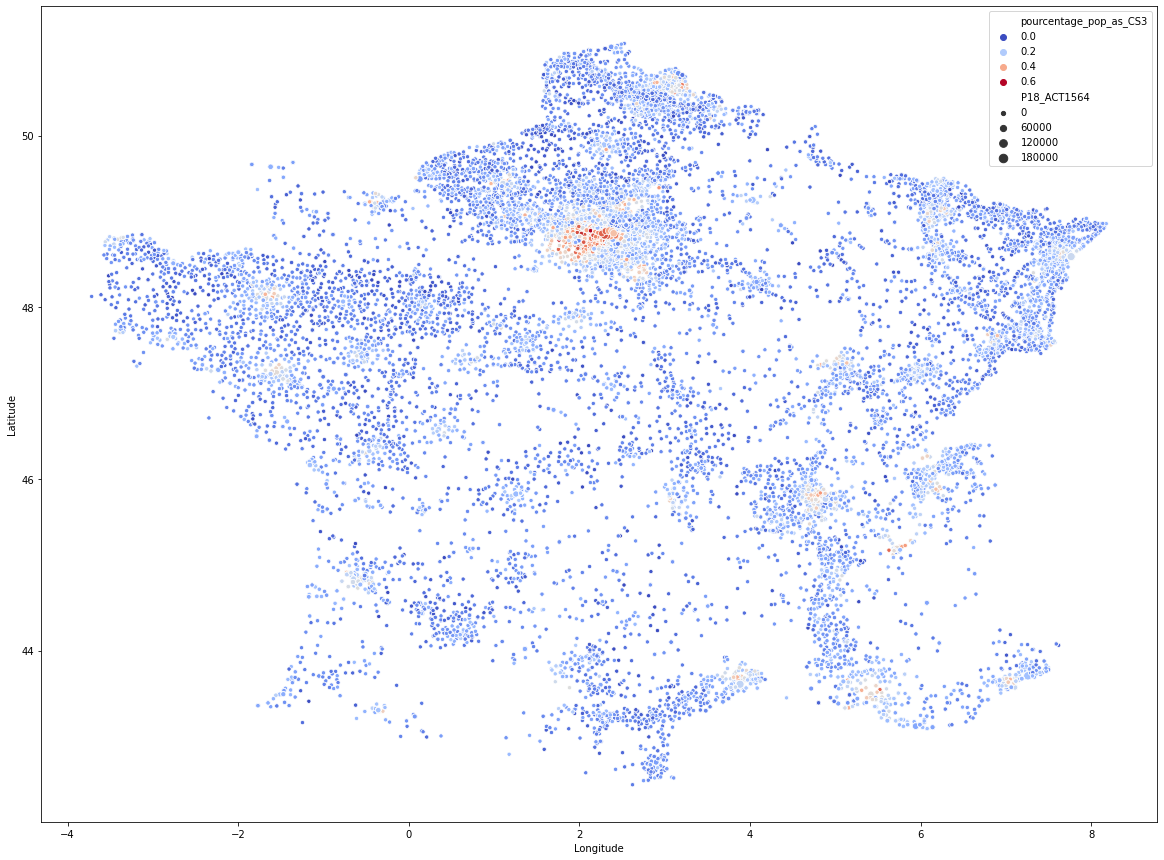

In [15]:
fig,ax = plt.subplots(1,1,figsize=(20,15))
sns.scatterplot(y='Latitude',x='Longitude',data=df_cho_lat[df_cho_lat['P18_ACT1564']>200], hue='pourcentage_pop_as_CS3',size='P18_ACT1564',palette='coolwarm')

In [28]:
df_cho_lat[[colonne for colonne in df_cho_lat.columns if 'pourcentage_pop_as_CS' in colonne]].sum(axis=1).mean()

0.9885015645591508

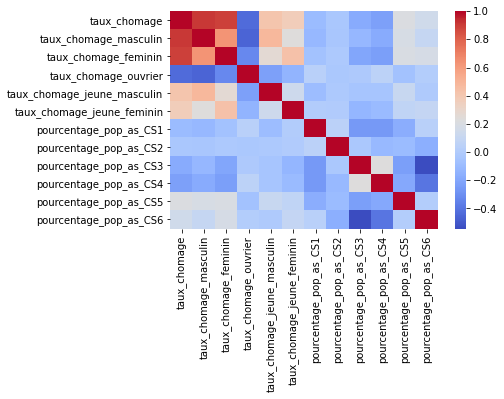

In [40]:
sns.heatmap(df_cho_lat.iloc[:,29:].corr(),cmap='coolwarm',)

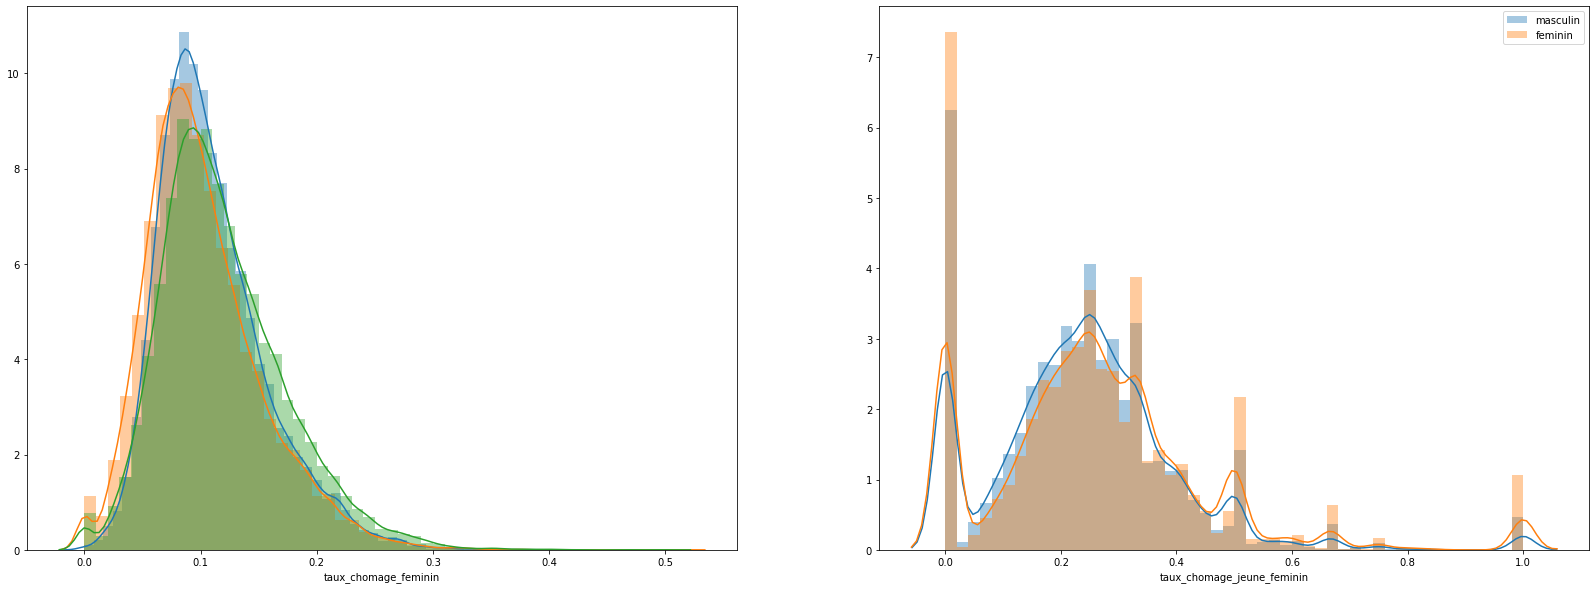

In [17]:
fig, ax = plt.subplots(1,2, figsize=(28,10))
sns.distplot(df_cho_lat['taux_chomage'],ax=ax[0],label='general')
sns.distplot(df_cho_lat['taux_chomage_masculin'],ax=ax[0],label='masculin')
sns.distplot(df_cho_lat['taux_chomage_feminin'],ax=ax[0],label='feminin')
sns.distplot(df_cho_lat['taux_chomage_jeune_masculin'],ax=ax[1],label='masculin')
sns.distplot(df_cho_lat['taux_chomage_jeune_feminin'],ax=ax[1],label='feminin')
plt.legend()

In [18]:
df_cho_lat[df_cho_lat['taux_chomage_jeune_masculin']>=1]

Code Insee   Latitude  Longitude  Dep CODGEO  P18_ACT1564  P18_CHOM1564  \
0           1002  46.006461   5.420510    1   1002   128.061728     10.411523   
68          1233  45.777945   5.548205    1   1233    55.000000      4.000000   
91          1298  46.192479   5.726818    1   1298    64.860000      6.580000   
122         1439  46.358692   4.866179    1   1439    53.000000      6.000000   
154         2066  49.758450   3.304676    2   2066    80.612245      8.163265   
...          ...        ...        ...  ...    ...          ...           ...   
19936      88360  48.129114   5.956189   88  88360    76.375646      5.307980   
20147      89170  47.435212   3.763676   89  89170    51.369231      8.723077   
20185      89296  47.690206   4.236087   89  89296    47.633588      6.946565   
21083      95046  49.125990   1.814316   95  95046    75.500000      9.182432   
21265      95543  49.061544   1.742592   95  95543   107.000000     11.000000   

       P18_HACT1564  P18_HCHOM1564  P18_FACT1564  ...  taux_chomage_feminin  \
0         64.551440       2.082305     63.510288  ...              0.131148   
68        33.000000       3.000000     22.000000  ...              0.045455   
91        34.780000       1.880000     30.080000  ...              0.156250   
122       28.000000       2.000000     25.000000  ...              0.160000   
154       40.816327       5.102041     39.795918  ...              0.076923   
...             ...            ...           ...  ...                   ...   
19936     33.971074       3.184788     42.404571  ...              0.050070   
20147     28.107692       4.846154     23.261538  ...              0.166667   
20185     27.786260       5.954198     19.847328  ...              0.050000   
21083     37.750000       6.121622     37.750000  ...              0.081081   
21265     51.000000       5.000000     56.000000  ...              0.107143   

       taux_chomage_ouvrier  taux_chomage_jeune_masculin  \
0                  1.000000                          1.0   
68                 1.000000                          1.0   
91                 1.000000                          1.0   
122                1.000000                          1.0   
154                0.666667                          1.0   
...                     ...                          ...   
19936              0.500000                          1.0   
20147              1.000000                          1.0   
20185              0.750000                          1.0   
21083              0.333333                          1.0   
21265              1.000000                          1.0   

       taux_chomage_jeune_feminin  pourcentage_pop_as_CS1  \
0                        0.600000                0.000000   
68                       0.000000                0.000000   
91                            NaN                0.072464   
122                      0.000000                0.000000   
154                      0.000000                0.253165   
...                           ...                     ...   
19936                    0.333333                0.000000   
20147                    0.250000                0.094340   
20185                    0.000000                0.000000   
21083                    0.333333                0.000000   
21265                    0.000000                0.000000   

       pourcentage_pop_as_CS2  pourcentage_pop_as_CS3  pourcentage_pop_as_CS4  \
0                    0.162602                0.121951                0.203252   
68                   0.090909                0.090909                0.272727   
91                   0.144928                0.144928                0.362319   
122                  0.094340                0.188679                0.377358   
154                  0.000000                0.000000                0.379747   
...                       ...                     ...                     ...   
19936                0.138997                0.000000          

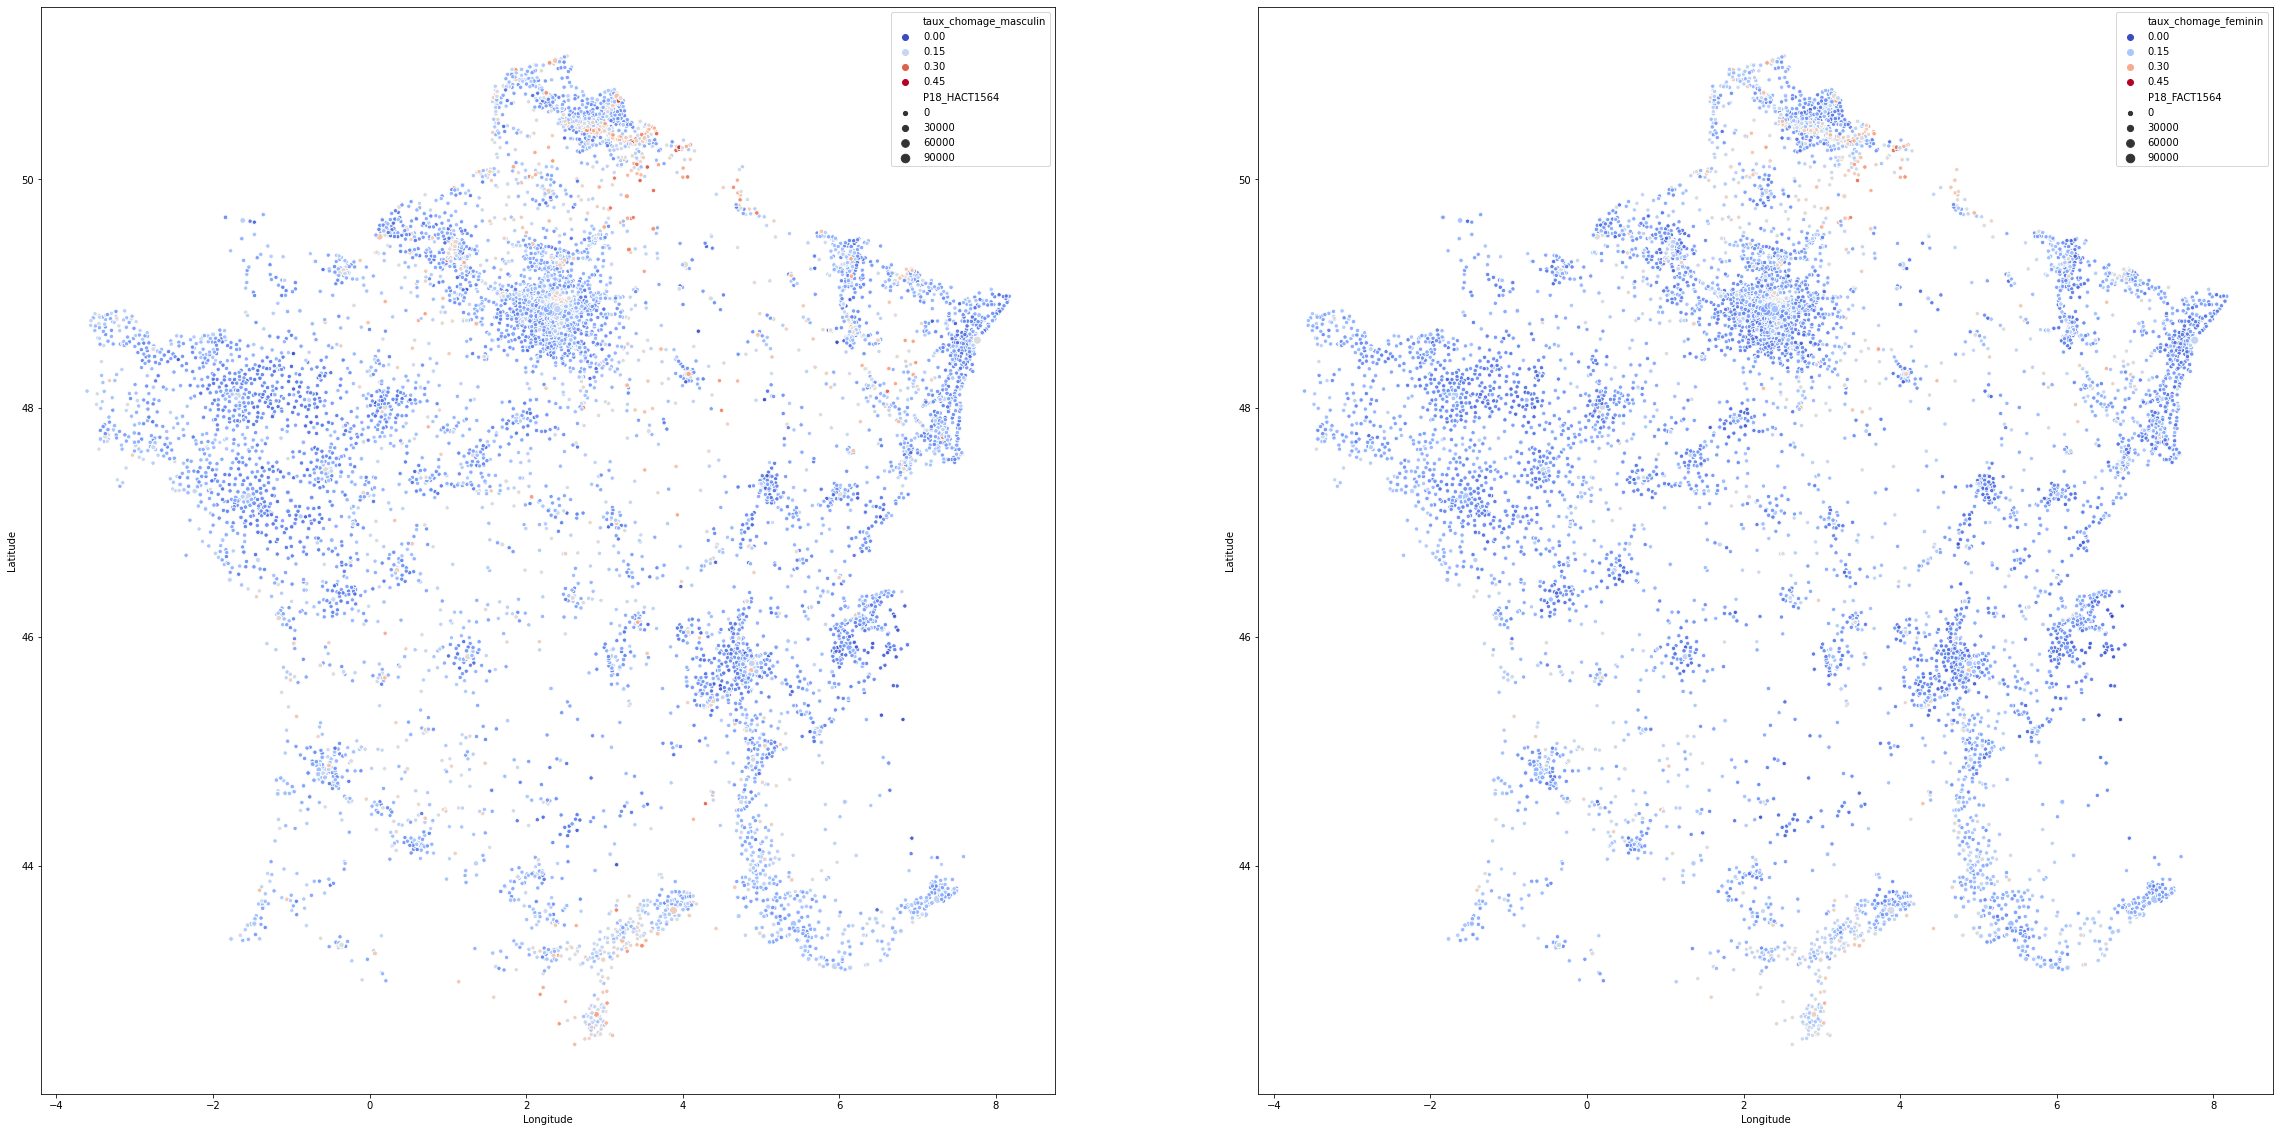

In [19]:
fig,axes = plt.subplots(1,2,figsize=(40,20))
sns.scatterplot(y='Latitude',x='Longitude',data=df_cho_lat[df_cho_lat['P18_HACT1564']>=200], size='P18_HACT1564',hue='taux_chomage_masculin',palette='coolwarm',ax=axes[0])
sns.scatterplot(y='Latitude',x='Longitude',data=df_cho_lat[df_cho_lat['P18_FACT1564']>=200], size='P18_FACT1564',hue='taux_chomage_feminin',palette='coolwarm',ax=axes[1])

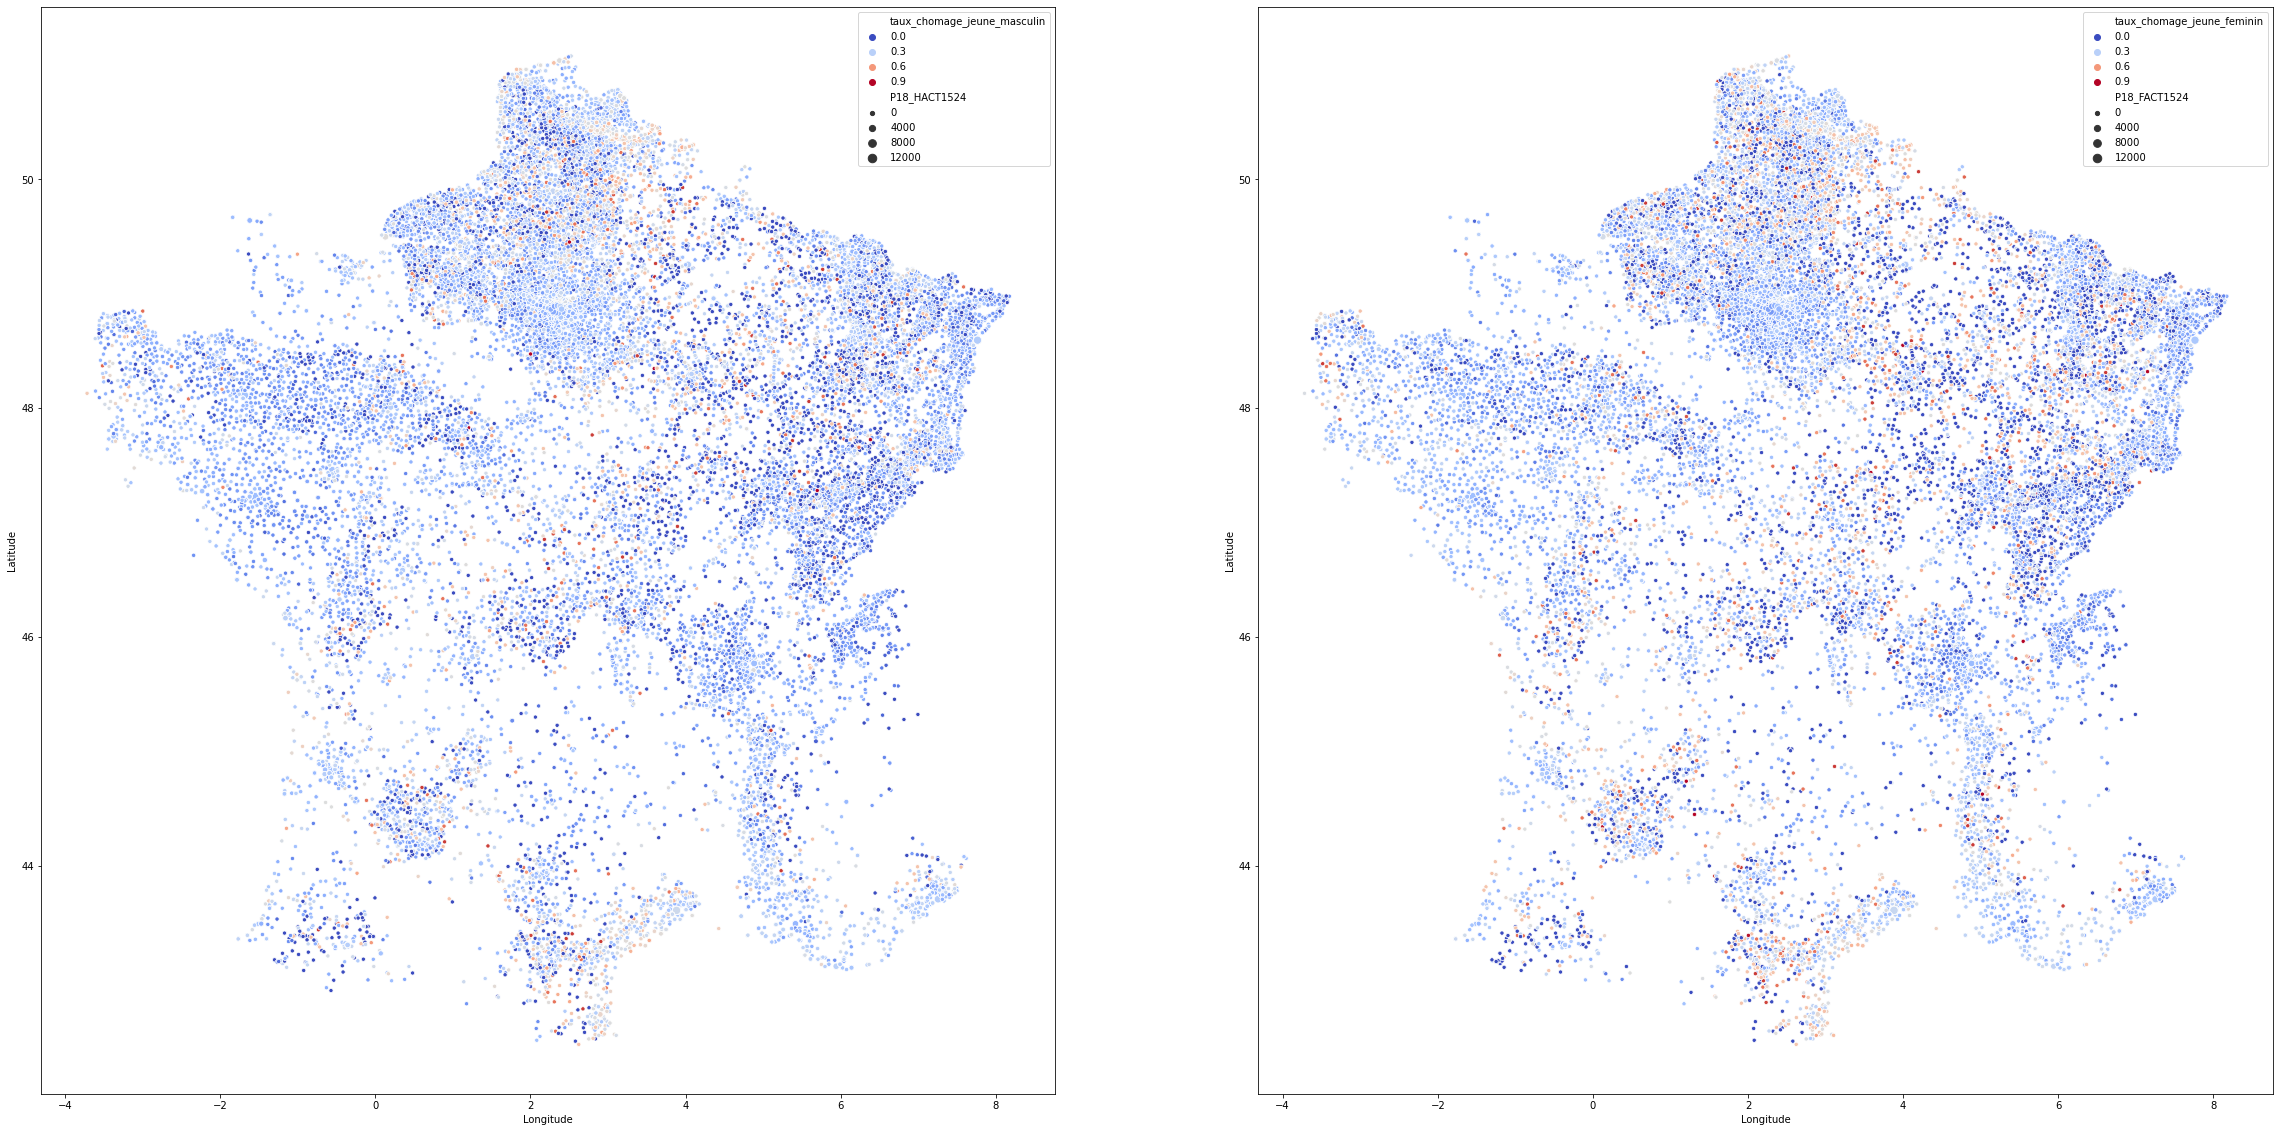

In [20]:
fig,axes = plt.subplots(1,2,figsize=(40,20))
sns.scatterplot(y='Latitude',x='Longitude',data=df_cho_lat[df_cho_lat['taux_chomage_jeune_masculin']<=0.8], size='P18_HACT1524',hue='taux_chomage_jeune_masculin',palette='coolwarm',ax=axes[0])
sns.scatterplot(y='Latitude',x='Longitude',data=df_cho_lat[df_cho_lat['taux_chomage_jeune_feminin']<=0.8], size='P18_FACT1524',hue='taux_chomage_jeune_feminin',palette='coolwarm',ax=axes[1])

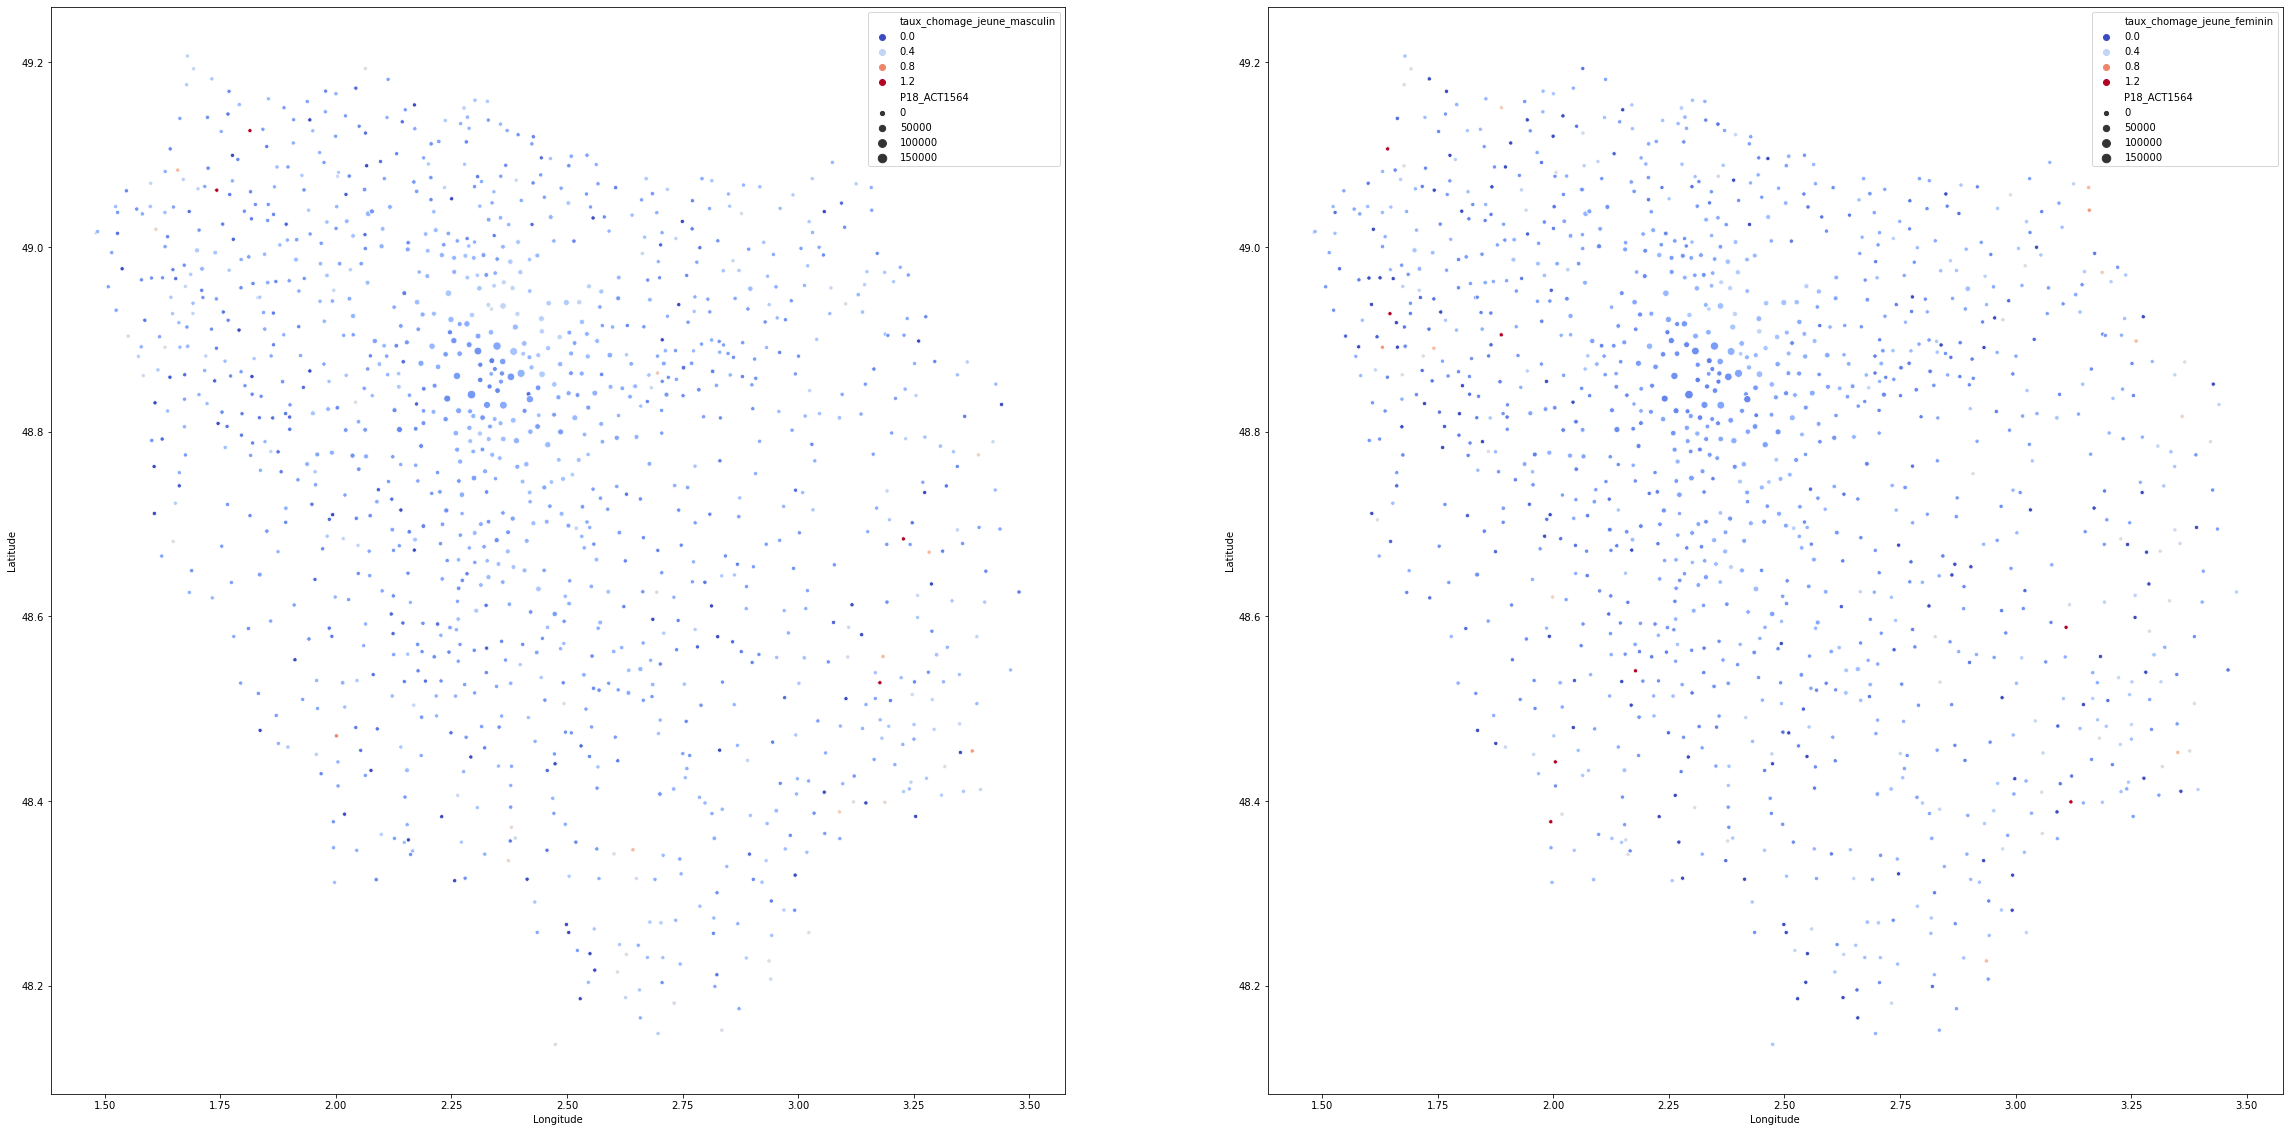

In [21]:
fig,axes = plt.subplots(1,2,figsize=(40,20))
sns.scatterplot(y='Latitude',x='Longitude',data=df_cho_lat[df_cho_lat['Dep'].isin(['75','77','78','91','92','93','94','95'])], size='P18_ACT1564',hue='taux_chomage_jeune_masculin',palette='coolwarm',ax=axes[0])
sns.scatterplot(y='Latitude',x='Longitude',data=df_cho_lat[df_cho_lat['Dep'].isin(['75','77','78','91','92','93','94','95'])], size='P18_ACT1564',hue='taux_chomage_jeune_feminin',palette='coolwarm',ax=axes[1])

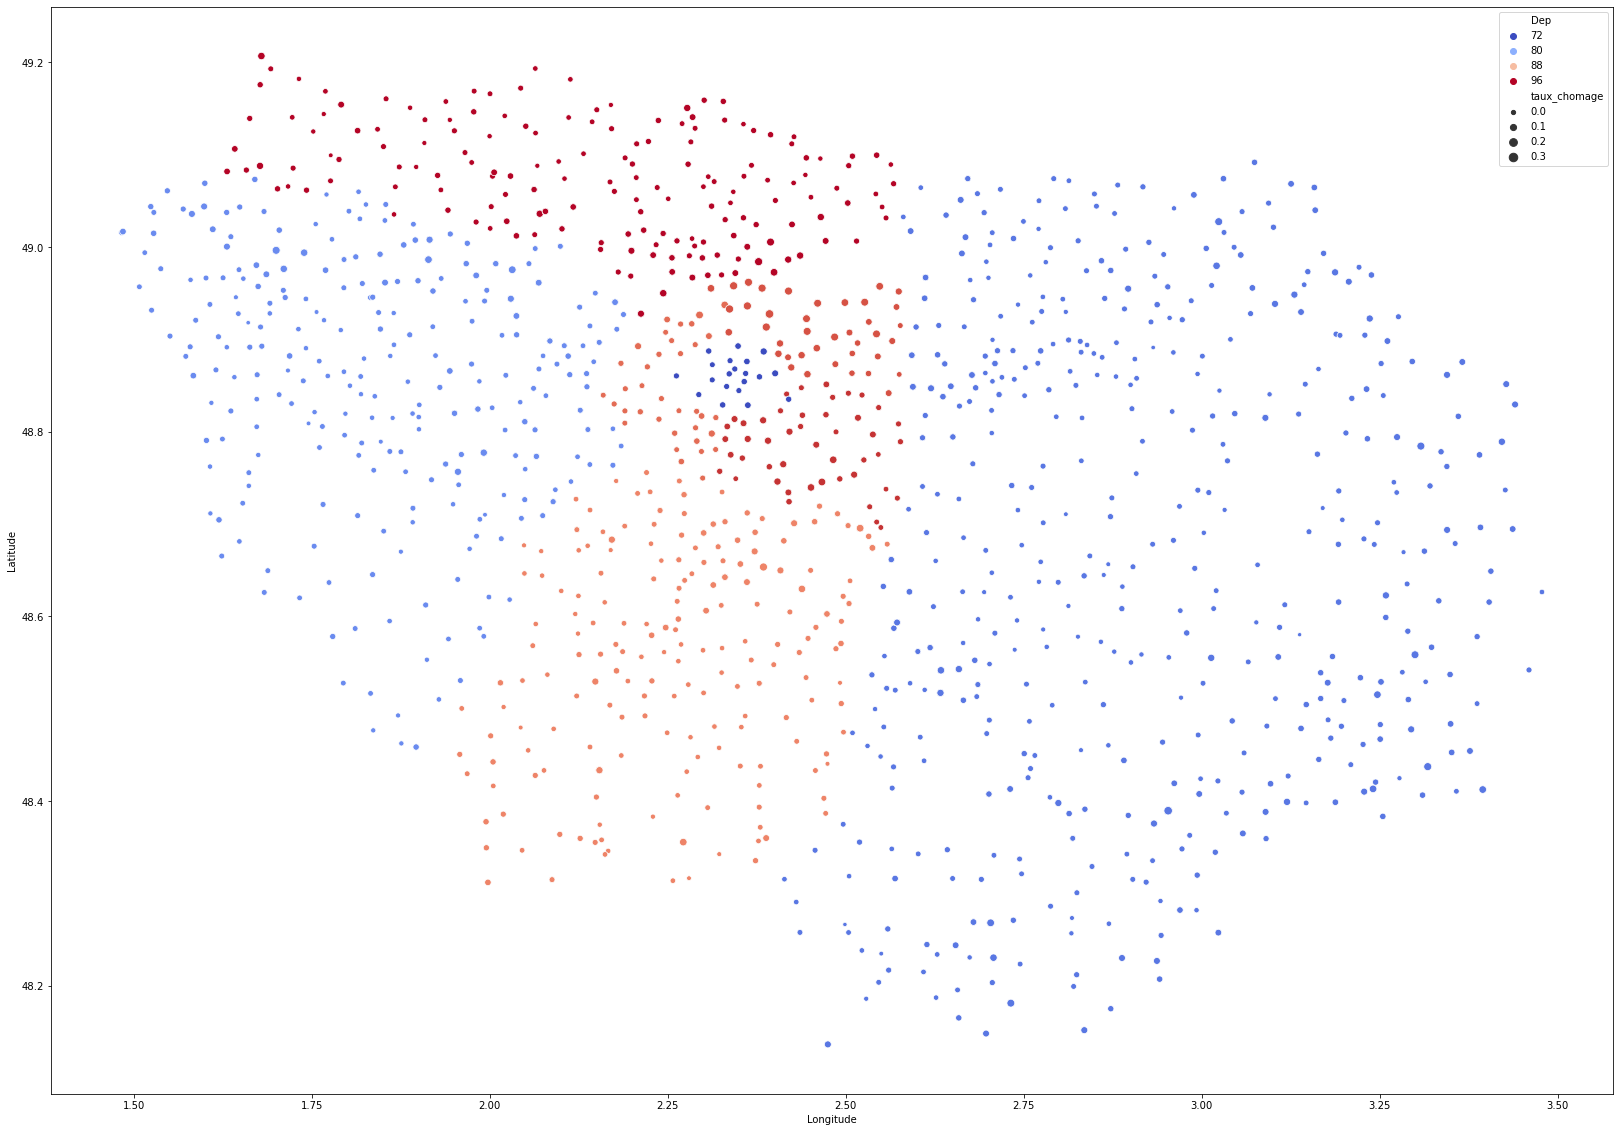

In [22]:
fig,ax = plt.subplots(1,1,figsize=(28,20))
sns.scatterplot(y='Latitude',x='Longitude',data=df_cho_lat[df_cho_lat['Dep'].isin(['75','77','78','91','92','93','94','95'])], hue='Dep',size='taux_chomage',palette='coolwarm')

In [23]:
df_merge = df_presi.merge(df_cho_lat[['Code Insee','P18_ACT1564',
                                      'taux_chomage','taux_chomage_masculin','taux_chomage_feminin',
                                      'taux_chomage_jeune_masculin','taux_chomage_jeune_feminin']+[colonne for colonne in df_cho_lat.columns if 'pourcentage_pop_as_CS' in colonne]],
               left_on='Code Insee',right_on='Code Insee')

In [24]:
df_presi.shape

(212487, 23)

In [107]:
df_presi['Code Insee'].nunique()

19317

In [108]:
df_cho_lat['Code Insee'].nunique()

18252

In [109]:
df_merge

Unnamed: 0 Code Insee            Nom   Voix   Latitude  Longitude  \
0                0       1002        ARTHAUD      2  46.006461    5.42051   
1                1       1002     ASSELINEAU      1  46.006461    5.42051   
2                2       1002      CHEMINADE      0  46.006461    5.42051   
3                3       1002  DUPONT-AIGNAN      6  46.006461    5.42051   
4                4       1002         FILLON     34  46.006461    5.42051   
...            ...        ...            ...    ...        ...        ...   
234779      236396      75120       LASSALLE    481  48.863187    2.40082   
234780      236397      75120         LE PEN   5305  48.863187    2.40082   
234781      236398      75120         MACRON  27399  48.863187    2.40082   
234782      236399      75120      MÉLENCHON  28512  48.863187    2.40082   
234783      236400      75120         POUTOU    920  48.863187    2.40082   

                        Ville  Exprimés  Dep  Pourcentage_vote  ...  \
0       L'Abergement-de-Varey       176    1          0.011364  ...   
1       L'Abergement-de-Varey       176    1          0.005682  ...   
2       L'Abergement-de-Varey       176    1          0.000000  ...   
3       L'Abergement-de-Varey       176    1          0.034091  ...   
4       L'Abergement-de-Varey       176    1          0.193182  ...   
...                       ...       ...  ...               ...  ...   
234779               Paris 20     89574   75          0.005370  ...   
234780               Paris 20     89574   75          0.059225  ...   
234781               Paris 20     89574   75          0.305881  ...   
234782               Paris 20     89574   75          0.318307  ...   
234783               Paris 20     89574   75          0.010271  ...   

        taux_chomage_masculin  taux_chomage_feminin  \
0                    0.032258              0.131148   
1                    0.032258              0.131148   
2                    0.032258              0.131148   
3                    0.032258              0.131148   
4                    0.032258              0.131148   
...                       ...                   ...   
234779               0.141509              0.145727   
234780               0.141509              0.145727   
234781               0.141509              0.145727   
234782               0.141509              0.145727   
234783               0.141509              0.145727   

        taux_chomage_jeune_masculin  taux_chomage_jeune_feminin  \
0                          1.000000                    0.600000   
1                          1.000000                    0.600000   
2                          1.000000                    0.600000   
3                          1.000000                    0.600000   
4                          1.000000                    0.600000   
...                             ...                         ...   
234779                     0.268994                    0.221301   
234780                     0.268994                    0.221301   
234781                     0.268994                    0.221301   
234782                     0.268994                    0.221301   
234783                     0.268994                    0.221301   

       pourcentage_pop_as_CS1  pourcentage_pop_as_CS2  pourcentage_pop_as_CS3  \
0                    0.000000                0.162602                0.121951   
1                    0.000000                0.162602                0.121951   
2                    0.000000                0.162602                0.121951   
3                    0.000000                0.162602                0.121951   
4                    0.000000                0.162602                0.121951   
...                       ...                     ...                     ...   
234779               0.000188                0.042474                0.362772   
234780               0.000188                0.042474                0.362772   
234781               0.000188      

In [110]:
df_merge = df_merge.drop_duplicates(['Code Insee','Nom','Voix'])

In [111]:
df_merge.columns

Index(['Unnamed: 0', 'Code Insee', 'Nom', 'Voix', 'Latitude', 'Longitude',
       'Ville', 'Exprimés', 'Dep', 'Pourcentage_vote', 'Total Voix',
       'Exprimes_bis', 'Code_postal', 'DEP', 'Nom_commune', 'P15_POP', 'MED14',
       'nombre de redevables', 'Typo degré de densité',
       'Part population dense (1)', 'Part population intermédiaire (2)',
       'Part population peu dense (3)', 'Part population très peu dense (4)',
       'P18_ACT1564', 'taux_chomage', 'taux_chomage_masculin',
       'taux_chomage_feminin', 'taux_chomage_jeune_masculin',
       'taux_chomage_jeune_feminin', 'pourcentage_pop_as_CS1',
       'pourcentage_pop_as_CS2', 'pourcentage_pop_as_CS3',
       'pourcentage_pop_as_CS4', 'pourcentage_pop_as_CS5',
       'pourcentage_pop_as_CS6'],
      dtype='object')

In [144]:
from sklearn.cluster import DBSCAN, KMeans 
from sklearn.mixture import GaussianMixture
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score, validation_curve
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import class_weight
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier,XGBRFRegressor

In [113]:
colonnes_clusters=list(df_merge.columns)[15:]

In [114]:
df_merge[colonnes_clusters].astype(float).isnull().sum()

P15_POP                                  0
MED14                                    0
nombre de redevables                     0
Typo degré de densité                    0
Part population dense (1)                0
Part population intermédiaire (2)        0
Part population peu dense (3)            0
Part population très peu dense (4)       0
P18_ACT1564                              0
taux_chomage                             0
taux_chomage_masculin                    0
taux_chomage_feminin                     0
taux_chomage_jeune_masculin           2145
taux_chomage_jeune_feminin            5654
pourcentage_pop_as_CS1                   0
pourcentage_pop_as_CS2                   0
pourcentage_pop_as_CS3                   0
pourcentage_pop_as_CS4                   0
pourcentage_pop_as_CS5                   0
pourcentage_pop_as_CS6                   0
dtype: int64

In [115]:
df_merge_bis = df_merge.copy()

In [116]:
mmsc = MinMaxScaler()
#df_merge_bis['P15_POP']=
df_merge_bis[['P15_POP','MED14','nombre de redevables','P18_ACT1564']]=mmsc.fit_transform(df_merge_bis[['P15_POP','MED14','nombre de redevables','P18_ACT1564']].astype(float))

In [117]:
df_merge_bis

Unnamed: 0 Code Insee            Nom   Voix   Latitude  Longitude  \
0                0       1002        ARTHAUD      2  46.006461    5.42051   
1                1       1002     ASSELINEAU      1  46.006461    5.42051   
2                2       1002      CHEMINADE      0  46.006461    5.42051   
3                3       1002  DUPONT-AIGNAN      6  46.006461    5.42051   
4                4       1002         FILLON     34  46.006461    5.42051   
...            ...        ...            ...    ...        ...        ...   
234779      236396      75120       LASSALLE    481  48.863187    2.40082   
234780      236397      75120         LE PEN   5305  48.863187    2.40082   
234781      236398      75120         MACRON  27399  48.863187    2.40082   
234782      236399      75120      MÉLENCHON  28512  48.863187    2.40082   
234783      236400      75120         POUTOU    920  48.863187    2.40082   

                        Ville  Exprimés  Dep  Pourcentage_vote  ...  \
0       L'Abergement-de-Varey       176    1          0.011364  ...   
1       L'Abergement-de-Varey       176    1          0.005682  ...   
2       L'Abergement-de-Varey       176    1          0.000000  ...   
3       L'Abergement-de-Varey       176    1          0.034091  ...   
4       L'Abergement-de-Varey       176    1          0.193182  ...   
...                       ...       ...  ...               ...  ...   
234779               Paris 20     89574   75          0.005370  ...   
234780               Paris 20     89574   75          0.059225  ...   
234781               Paris 20     89574   75          0.305881  ...   
234782               Paris 20     89574   75          0.318307  ...   
234783               Paris 20     89574   75          0.010271  ...   

        taux_chomage_masculin  taux_chomage_feminin  \
0                    0.032258              0.131148   
1                    0.032258              0.131148   
2                    0.032258              0.131148   
3                    0.032258              0.131148   
4                    0.032258              0.131148   
...                       ...                   ...   
234779               0.141509              0.145727   
234780               0.141509              0.145727   
234781               0.141509              0.145727   
234782               0.141509              0.145727   
234783               0.141509              0.145727   

        taux_chomage_jeune_masculin  taux_chomage_jeune_feminin  \
0                          1.000000                    0.600000   
1                          1.000000                    0.600000   
2                          1.000000                    0.600000   
3                          1.000000                    0.600000   
4                          1.000000                    0.600000   
...                             ...                         ...   
234779                     0.268994                    0.221301   
234780                     0.268994                    0.221301   
234781                     0.268994                    0.221301   
234782                     0.268994                    0.221301   
234783                     0.268994                    0.221301   

       pourcentage_pop_as_CS1  pourcentage_pop_as_CS2  pourcentage_pop_as_CS3  \
0                    0.000000                0.162602                0.121951   
1                    0.000000                0.162602                0.121951   
2                    0.000000                0.162602                0.121951   
3                    0.000000                0.162602                0.121951   
4                    0.000000                0.162602                0.121951   
...                       ...                     ...                     ...   
234779               0.000188                0.042474                0.362772   
234780               0.000188                0.042474                0.362772   
234781               0.000188      

In [118]:
colonnes_clusters

['P15_POP',
 'MED14',
 'nombre de redevables',
 'Typo degré de densité',
 'Part population dense (1)',
 'Part population intermédiaire (2)',
 'Part population peu dense (3)',
 'Part population très peu dense (4)',
 'P18_ACT1564',
 'taux_chomage',
 'taux_chomage_masculin',
 'taux_chomage_feminin',
 'taux_chomage_jeune_masculin',
 'taux_chomage_jeune_feminin',
 'pourcentage_pop_as_CS1',
 'pourcentage_pop_as_CS2',
 'pourcentage_pop_as_CS3',
 'pourcentage_pop_as_CS4',
 'pourcentage_pop_as_CS5',
 'pourcentage_pop_as_CS6']

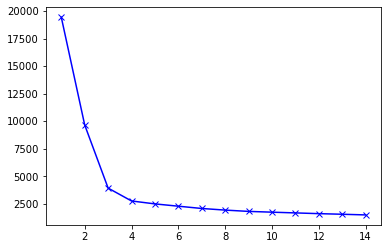

In [119]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_merge_bis.drop_duplicates(['Code Insee']).dropna()[colonnes_clusters].astype(float))
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')

In [120]:
df_merge_third = df_merge_bis.drop_duplicates(['Code Insee']).dropna()

In [121]:
df_merge_third['preds']= km.predict(df_merge_third[colonnes_clusters])

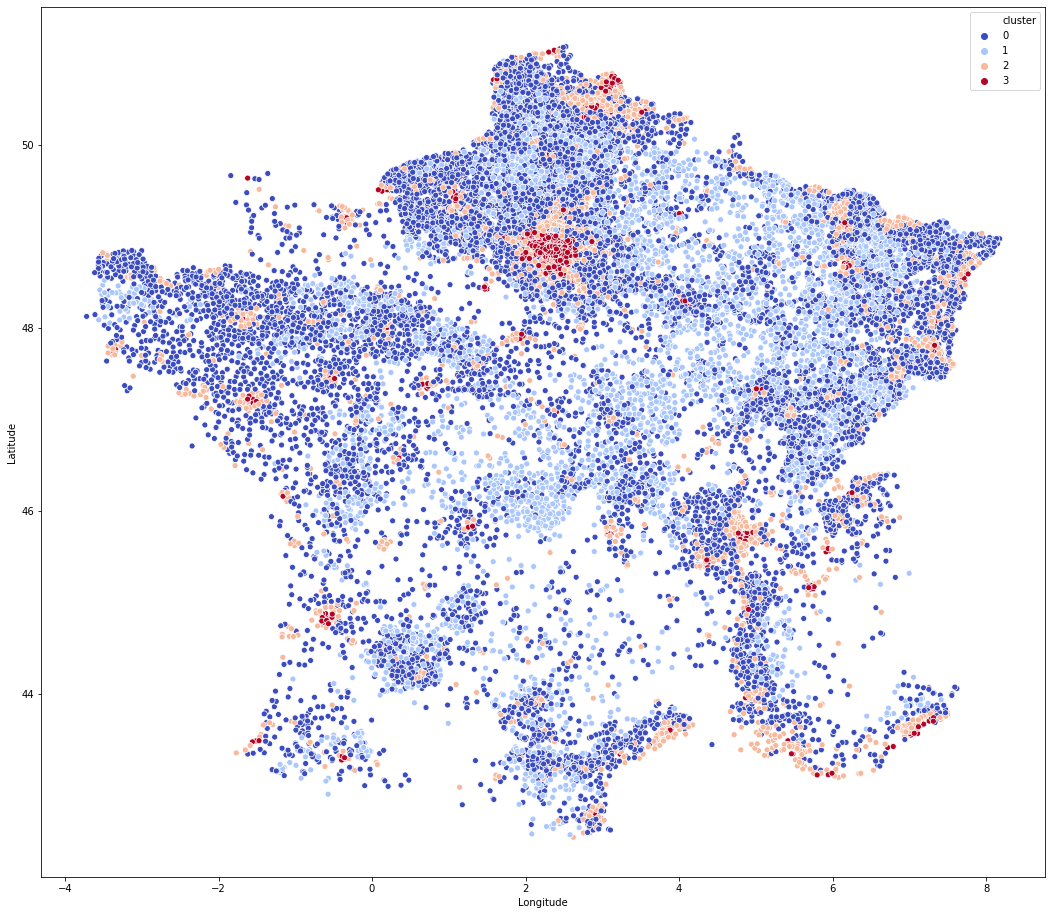

In [123]:
model=KMeans(n_clusters=4)
model.fit(df_merge_third[colonnes_clusters])
df_merge_third['cluster']=model.predict(df_merge_third[colonnes_clusters])
fig, ax = plt.subplots(1,1,figsize=(18,16))
sns.scatterplot(x='Longitude',y='Latitude',data=df_merge_third,hue='cluster',palette='coolwarm')

In [124]:
df_merge['Exprimes_bis']

0         0.011364
1         0.005682
2         0.000000
3         0.034091
4         0.193182
            ...   
234779    0.005370
234780    0.059225
234781    0.305881
234782    0.318307
234783    0.010271
Name: Exprimes_bis, Length: 200772, dtype: float64

In [129]:
candidat='MACRON'

In [140]:
X = df_merge[df_merge['Nom']==candidat].dropna()[colonnes_clusters]
sc = StandardScaler()
#X_final=sc.fit_transform(X)
X_final = sm.add_constant(X)
y=100*df_merge[df_merge['Nom']==candidat].dropna()['Exprimes_bis'].values

In [141]:
print(X.shape)
print(y.shape)

(17587, 20)
(17587,)


In [142]:
model = sm.OLS(y, X_final)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     270.5
Date:                Thu, 30 Sep 2021   Prob (F-statistic):               0.00
Time:                        18:57:44   Log-Likelihood:                -52386.
No. Observations:               17587   AIC:                         1.048e+05
Df Residuals:                   17566   BIC:                         1.050e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [145]:
model =XGBRFRegressor()
model.fit(X,y)

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
               interaction_constraints='', max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=12, num_parallel_tree=100,
               objective='reg:squarederror', random_state=0, reg_alpha=0,
               scale_pos_weight=1, tree_method='exact', validate_parameters=1,
               verbosity=None)

In [147]:
model.score(X,y)

0.33964729822882145

In [134]:
def validation_curve_plotting(model,param_range,param_name,inputs=X,labels=y,cv=6):
    train_scores, valid_scores = validation_curve(model,inputs,labels,
                                                  param_name=param_name,param_range=param_range,cv=cv,scoring='recall',verbose=1,n_jobs=-1)
    train_mean_score = np.mean(train_scores,axis=1)
    valid_mean_score = np.mean(valid_scores,axis=1)
    
    fig, ax = plt.subplots(1,1,figsize=(12,7))
    ax.plot(train_mean_score, label='Training Score')
    ax.plot(valid_mean_score, label='Test Score')
    ax.set_xticklabels(labels=list(param_range))
    plt.xlabel(str(param_name))
    plt.ylabel("Score with "+str(cv)+' cv')
    plt.legend()
    
    return (param_range[valid_mean_score.argmax()],valid_mean_score.max()),train_mean_score, valid_mean_score

In [135]:
df_classification = df_merge.sort_values(['Code Insee','Voix'],ascending=[1,0]).drop_duplicates(['Code Insee']).dropna()

In [136]:
y=df_classification['Nom']
X = df_classification[colonnes_clusters]

In [137]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.pipeline import Pipeline

In [141]:
y_final=pd.get_dummies(y).values

In [142]:
xtrain, xtest, ytrain, ytest=train_test_split(X, y_final, train_size=0.8, random_state=88)
print(len(xtest)) 


classifier = MultiOutputClassifier(XGBClassifier())
clf = Pipeline([('classify', classifier)
               ])
print (clf)


clf.fit(xtrain, ytrain)
print(clf.score(xtrain, ytrain))

yhat = clf.predict(xtest)

3518
Pipeline(steps=[('classify',
                 MultiOutputClassifier(estimator=XGBClassifier(base_score=None,
                                                               booster=None,
                                                               colsample_bylevel=None,
                                                               colsample_bynode=None,
                                                               colsample_bytree=None,
                                                               gamma=None,
                                                               gpu_id=None,
                                                               importance_type='gain',
                                                               interaction_constraints=None,
                                                               learning_rate=None,
                                                               max_delta_step=None,
                                                    

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[13:00:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:00:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:00:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:00:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_re

In [147]:
cm_y1 = confusion_matrix(ytest[:,0],yhat[:,0])

In [159]:
yhat.argmax(axis=1)

array([0, 3, 3, ..., 4, 3, 0], dtype=int64)

In [157]:
ytest.argmax(axis=1)

array([4, 3, 3, ..., 1, 3, 3], dtype=int64)

In [148]:
cm_y1 = confusion_matrix(ytest[:,0],yhat[:,0])
cm_y2 = confusion_matrix(ytest[:,1],yhat[:,1])
cm_y3 = confusion_matrix(ytest[:,2],yhat[:,2])
cm_y4 = confusion_matrix(ytest[:,3],yhat[:,3])
cm_y5 = confusion_matrix(ytest[:,4],yhat[:,4])

In [152]:
cm_y5

array([[2733,  122],
       [ 492,  171]], dtype=int64)

In [160]:
confusion_matrix(ytest.argmax(axis=1),yhat.argmax(axis=1))

array([[   0,    0,    0,    1,    0],
       [ 167,   99,  281,   46,    0],
       [ 232,   34, 1728,   41,    5],
       [ 159,   48,  301,  154,    1],
       [  42,    3,  148,    9,   19]], dtype=int64)